#### 1 Introduction to Monte Carlo Simulations

In [ ]:
def deterministic_inflation(year, yearly_increase_percent):
    inflation_rate = 8.6
    inflation_rate = inflation_rate*((100+yearly_increase_percent)/100)**(year-2022)
    return(inflation_rate)

# Print the deterministic simulation results
print(deterministic_inflation(2050, 2))

In [ ]:
# Complete the function definition by defining the yearly_increase variable
def monte_carlo_inflation(year, seed):
    random.seed(seed)
    inflation_rate = 8.6
    yearly_increase = random.randint(1, 3)
    for i in range(year - 2022):
        inflation_rate = inflation_rate*((100 + yearly_increase)/100)
    return(inflation_rate)

In [ ]:
def monte_carlo_inflation(year, seed):
    random.seed(seed)
    inflation_rate = 8.6
    yearly_increase = random.randint(1, 3)
    for i in range(year - 2022):
        inflation_rate = inflation_rate*((100 + yearly_increase)/100)
    return(inflation_rate)
  
# Simulate the inflation rate for the year 2050 with a seed of 1234
print(monte_carlo_inflation(2050, 1234))

# Simulate the inflation rate for the year 2050 with a seed of 34228
print(monte_carlo_inflation(2050, 34228))

In [ ]:
# Calculate the average of 1,000 simulation results with a seed between 0 and 20000
rates_1 = []
for i in range(1000):
    seed = random.randint(0, 20000)
    rates_1.append(monte_carlo_inflation(2050, seed))
print(np.mean(rates_1))

# Calculate the average of 10,000 simulation results with a seed between 0 and 20000
rates_2 = []
for i in range(10000):
    seed = random.randint(0, 20000)
    rates_2.append(monte_carlo_inflation(2050, seed))
print(np.mean(rates_2))

In [ ]:
simu_weights = []

# Sample nine values from nba_weights with replacement 1000 times
for i in range(1000):
    bootstrap_sample = random.choices(nba_weights, k=9)
    simu_weights.append(np.mean(bootstrap_sample))

# Calculate the mean and 95% confidence interval of the mean for your results
mean_weight = np.mean(simu_weights)
upper = np.quantile(simu_weights, 0.975)
lower = np.quantile(simu_weights, 0.025)
print(mean_weight, lower, upper)

In [ ]:
# Plot the distribution of the simulated weights
sns.displot(simu_weights, kde=True)

# Plot vertical lines for the 95% confidence intervals and mean
plt.axvline(lower, color="red")
plt.axvline(upper, color="red")
plt.axvline(mean_weight, color="green")
plt.show()

In [ ]:
# Define all_weights
all_weights = nba_weights + us_adult_weights
simu_diff = []

for i in range(1000):
	# Perform the permutation on all_weights
    perm_sample = np.random.permutation(all_weights)
    # Assign the permutated samples to perm_nba and perm_adult
    perm_nba, perm_adult = perm_sample[:13], perm_sample[13:]
    perm_diff = np.mean(perm_nba) - np.mean(perm_adult)
    simu_diff.append(perm_diff)
mean_diff = np.mean(nba_weights) - np.mean(us_adult_weights) 
upper = np.quantile(simu_diff, 0.975)
lower = np.quantile(simu_diff, 0.025)
print(mean_diff, lower, upper)

![Screenshot 2023-05-18 at 3.11.58 PM.png](<attachment:Screenshot 2023-05-18 at 3.11.58 PM.png>)
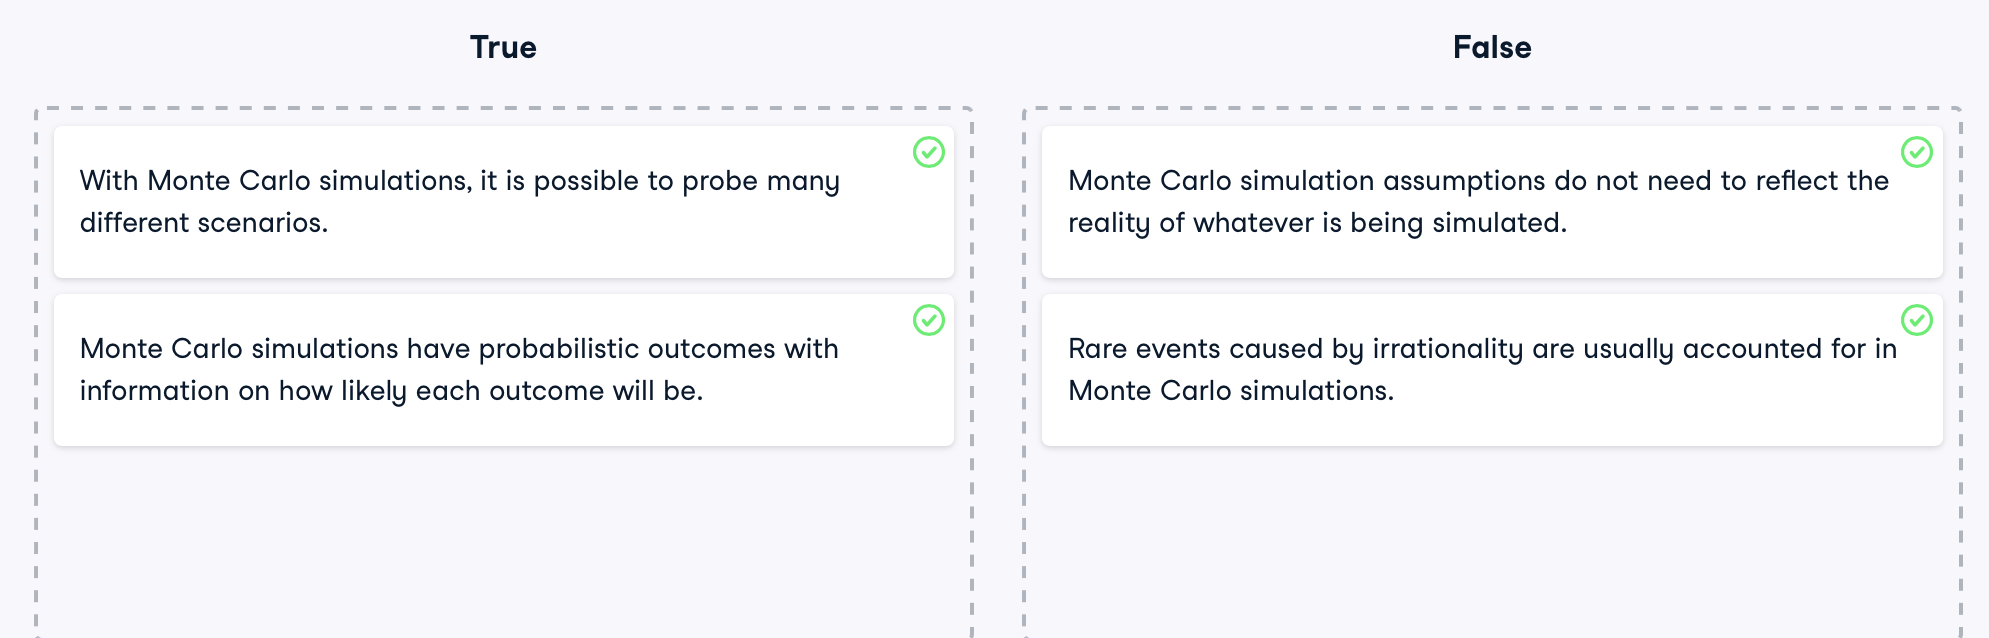

In [ ]:
def roll_paired_biased_dice(n, seed=1231):
    random.seed(seed)
    results={}
    for i in range(n):
        bag_index = random.randint(0, 1)
        # Obtain the dice indices
        dice_index1 = random.randint(0, 5)
        dice_index2 = random.randint(0, 5)
        # Sample a pair of dice from bag1 and bag2
        point1 = bag1[bag_index][dice_index1]
        point2 = bag2[bag_index][dice_index2]
        key = "%s_%s" % (point1,point2)
        if point1 + point2 == 8: 
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({'dice1_dice2':results.keys(),
		'probability_of_success':np.array(list(results.values()))*100.0/n}))

In [ ]:
def roll_paired_biased_dice(n, seed=1231):
    results = {}
    random.seed(seed)
    for i in range(n):
        bag_index = random.randint(0, 1)
        dice_index1 = random.randint(0, 5)
        dice_index2 = random.randint(0, 5)
        point1 = bag1[bag_index][dice_index1]
        point2 = bag2[bag_index][dice_index2]
        key = "%s_%s" % (point1, point2)
        if point1 + point2 == 8: 
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({"dice1_dice2":results.keys(),
		"probability_of_success":np.array(list(results.values()))*100.0/n}))

# Run the simulation 10,000 times and assign the result to df_results
df_results = roll_paired_biased_dice(10000, seed=1231)
sns.barplot(x="dice1_dice2", y="probability_of_success", data=df_results)
plt.show()

#### 2 Foundations for Monte Carlo

Which one of the following statements about the Monte Carlo simulation process is incorrect?

Monte Carlo simulations are stochastic, so there are no deterministic calculations involved.

In [ ]:
n = 10000
circle_points = 0 
square_points = 0 
for i in range(n):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    dist_from_origin = x**2 + y**2
    # Increment circle_points for any point with a distance from origin of less than .75
    if dist_from_origin < 0.75:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

In [ ]:
n = 10000
circle_points = 0 
square_points = 0 
for i in range(n):
    # Sample the x and y coordinates from -1 to 1 using random.randint()
    x = random.randint(-1, 1)
    y = random.randint(-1, 1)
    dist_from_origin = x**2 + y**2
    if dist_from_origin <= 1:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

In [ ]:
# Define low and high for use in rvs sampling below
low = 1
high = 7
# Sample 1,000 times from the discrete uniform distribution
samples = st.randint.rvs(low, high, size=1000)

samples_dict = {'nums':samples}
sns.histplot(x='nums', data=samples_dict, bins=6, binwidth=0.3)
plt.show()

In [ ]:
# Set p to the appropriate probability of success
p = 0.2

# Sample from the geometric distribution 10,000 times
samples = st.geom.rvs(p, size=10000)
samples_dict = {"nums":samples}
sns.histplot(x="nums", data=samples_dict)  
plt.show()

In [ ]:
for p in [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]: 
    low = 1
    high = 7
	# Simulate rolling Tom's die 10,000 times
    die_samples = st.randint.rvs(low, high, size=10000)
	# Simulate Eva's coin flips to land heads 10,000 times
    coin_samples = st.geom.rvs(p, size=10000)
    diff = np.mean(die_samples - coin_samples)
    print(diff)

In [ ]:
random.seed(1222)

# Sample 1,000 times from the normal distribution where the mean is 177
heights_177_8 = st.norm.rvs(loc=177, scale=8, size=1000)
print(np.mean(heights_177_8))
upper = np.quantile(heights_177_8, 0.975)
lower = np.quantile(heights_177_8, 0.025)
print([lower, upper])

# Sample 1,000 times from the normal distribution where the mean is 185
heights_185_8 = st.norm.rvs(loc=185, scale=8, size=1000)
print(np.mean(heights_185_8))
upper = np.quantile(heights_185_8, 0.975)
lower = np.quantile(heights_185_8, 0.025)
print([lower, upper])

In [ ]:
random.seed(1231)
heights_177_8 = st.norm.rvs(loc=177, scale=8, size=1000)
print(np.mean(heights_177_8))
upper = np.quantile(heights_177_8, 0.975)
lower = np.quantile(heights_177_8, 0.025)
print([lower, upper])

# Sample 1,000 times from the normal distribution where the standard deviation is 15
heights_177_15 = st.norm.rvs(loc=177, scale=15, size=1000)
print(np.mean(heights_177_15))
upper = np.quantile(heights_177_15, 0.975)
lower = np.quantile(heights_177_15, 0.025)
print([lower, upper])

In [ ]:
# Sample from the normal distribution
income1 = st.norm.rvs(loc=500, scale=50, size=1000)
income2 = st.norm.rvs(loc=1000, scale=200, size=1000)

# Define total_income
total_income = income1 + income2
upper = np.quantile(total_income, 0.975)
lower = np.quantile(total_income, 0.025)
print([lower, upper])

In [ ]:
# Define the probabilities of sunny, cloudy, and rainy days
p_sunny = 300/365
p_cloudy = 35/365
p_rainy = 30/365
num_of_days_in_a_year = 365
number_of_years = 50

In [ ]:
p_sunny = 300/365
p_cloudy = 35/365
p_rainy = 30/365
num_of_days_in_a_year = 365
number_of_years = 50

# Simulate results
days = st.multinomial.rvs(num_of_days_in_a_year,
    [p_sunny, p_cloudy, p_rainy], size=number_of_years)

# Complete the definition of df_days
df_days = pd.DataFrame({"sunny": days[:, 0],
     "cloudy": days[:, 1],
     "rainy":  days[:, 2]})
sns.pairplot(df_days)
plt.show()

In [ ]:
# Generate a pairplot of the data
sns.pairplot(house_price_size)
plt.show()

In [ ]:
sns.pairplot(house_price_size)
plt.show()

# Estimate the variance and covariances of house prices and sizes
print(house_price_size.cov())

In [ ]:
# Assign the mean of price and size, sample size, and covariance matrix of price and size
mean_value = [20, 500]
cov_mat = np.array([[19, 950], [950, 50000]])
sample_size = 5000

In [ ]:
mean_value = [20, 500]
sample_size_value = 5000
cov_mat = np.array([[19, 950], [950, 50000]])

# Simulate the results using sampling
simulated_results = st.multivariate_normal.rvs(mean=mean_value, cov=cov_mat, size=sample_size_value)
simulated_house_price_size = pd.DataFrame({"price":simulated_results[:,0],
                         				   "size":simulated_results[:,1]})

# Visualize the results 
sns.pairplot(simulated_house_price_size)
plt.show()

#### 3 Principled Monte Carlo Simulation

In [ ]:
# Create a pairplot of tc, ldl, and hdl
sns.pairplot(dia[['tc', 'ldl', 'hdl']])
plt.show()

# Calculate correlation coefficients
print(dia[['tc', 'ldl', 'hdl']].corr())

In [ ]:
# Create a pairplot of tc, hdl, and y
sns.pairplot(dia[['tc', 'hdl', 'y']])
plt.show()

# Calculate correlation coefficients
print(dia[['tc', 'hdl', 'y']].corr())

Which one of the following statements about exploring data in preparation for a Monte Carlo simulation is incorrect?

People often use probability distributions that they are already familiar with to run their simulations, so there is no need to check the distribution of data to perform a simulation.

In [ ]:
distributions = [st.uniform, st.norm, st.expon]
mles = []
for distribution in distributions:
    # Fit the distribution and obtain the MLE value
    pars = distribution.fit(dia['age'])
    mle = distribution.nnlf(pars, dia['age'])
    mles.append(mle)
print(mles)

In [ ]:
# Plot a histogram of clerk_data
sns.histplot(clerk_data)
plt.show()

In [ ]:
sns.histplot(clerk_data)
plt.show()

# Define a list of distributions to evaluate: uniform, normal and exponential
distributions = [st.uniform, st.norm, st.expon]
mles = []
for distribution in distributions:
    # Fit each distribution, extract the MLE value, and append it to mles
    params = distribution.fit(clerk_data)
    mle = distribution.nnlf(params, clerk_data)
    mles.append(mle)
print(mles)

In [ ]:
cov_dia = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].cov()
mean_dia = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].mean()

# Complete the code to perform the simulation
simulation_results = st.multivariate_normal.rvs(mean=mean_dia, cov=cov_dia, size=10000)
df_results = pd.DataFrame(simulation_results,columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])

# Calculate bmi and tc means for the historical and simulated results
print(dia[["bmi", "tc"]].mean())
print(df_results[["bmi", "tc"]].mean())
     
# Calculate bmi and tc covariances for the historical and simulated results
print(dia[["bmi", "tc"]].cov())
print(df_results[["bmi", "tc"]].cov())

In [ ]:
# Calculate the covariance matrix of bmi and tc
cov_dia2 = dia[["bmi", "tc"]].cov()

# Calculate the correlation matrix of bmi and tc
corr_dia2 = dia[["bmi", "tc"]].corr()
std_dia2 = dia[["bmi","tc"]].std()

print(f'Covariance of bmi and tc from covariance matrix :{cov_dia2.iloc[0,1]}')
print(f'Covariance of bmi and tc from correlation matrix :{corr_dia2.iloc[0,1] * std_dia2[0] * std_dia2[1]}')

In [ ]:
cov_dia = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].cov()
mean_dia = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].mean()

simulation_results = st.multivariate_normal.rvs(mean=mean_dia, size=10000, cov=cov_dia)

df_results = pd.DataFrame(simulation_results, columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])

# Calculate the 0.1st quantile of the tc variable
print(np.quantile(df_results["tc"], 0.001))

In [ ]:
simulation_results = st.multivariate_normal.rvs(mean=mean_dia, size=20000, cov=cov_dia)
df_results = pd.DataFrame(simulation_results,columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
predicted_y = regr_model.predict(df_results)
df_y = pd.DataFrame(predicted_y, columns=["predicted_y"])
df_summary = pd.concat([df_results,df_y], axis=1)

# Calculate the 10th and 90th quantile of bmi in the simulated results
bmi_q10 = np.quantile(df_summary["bmi"], 0.1)
bmi_q90 = np.quantile(df_summary["bmi"], 0.9)

# Use bmi_q10 and bmi_q90 to filter df_summary and obtain predicted y values
mean_bmi_q90_outcome = np.mean(df_summary[(df_summary["bmi"] > bmi_q90)]["predicted_y"])
mean_bmi_q10_outcome = np.mean(df_summary[(df_summary["bmi"] < bmi_q10)]["predicted_y"])
y_diff = mean_bmi_q90_outcome - mean_bmi_q10_outcome
print(y_diff)

In [ ]:
simulation_results = st.multivariate_normal.rvs(mean=mean_dia, size=20000, cov=cov_dia)
df_results = pd.DataFrame(simulation_results,columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
predicted_y = regr_model.predict(df_results)
df_y = pd.DataFrame(predicted_y, columns=["predicted_y"])
df_summary = pd.concat([df_results,df_y], axis=1)
hdl_q25 = np.quantile(df_summary["hdl"], 0.25)
hdl_q75 = np.quantile(df_summary["hdl"], 0.75)
bmi_q10 = np.quantile(df_summary["bmi"], 0.10)
bmi_q90 = np.quantile(df_summary["bmi"], 0.90)

# Complete the mean outcome definitions
bmi_q90_hdl_q75_outcome = np.mean(df_summary[(df_summary["bmi"] > bmi_q90) & (df_summary["hdl"] > hdl_q75)]["predicted_y"])
bmi_q10_hdl_q15_outcome = np.mean(df_summary[(df_summary["bmi"] < bmi_q10) & (df_summary["hdl"] < hdl_q25)]["predicted_y"])
y_diff = bmi_q90_hdl_q75_outcome - bmi_q10_hdl_q15_outcome
print(y_diff)

#### 4 Model Checking and Results Interpretation

![Screenshot 2023-05-18 at 3.27.27 PM.png](<attachment:Screenshot 2023-05-18 at 3.27.27 PM.png>)
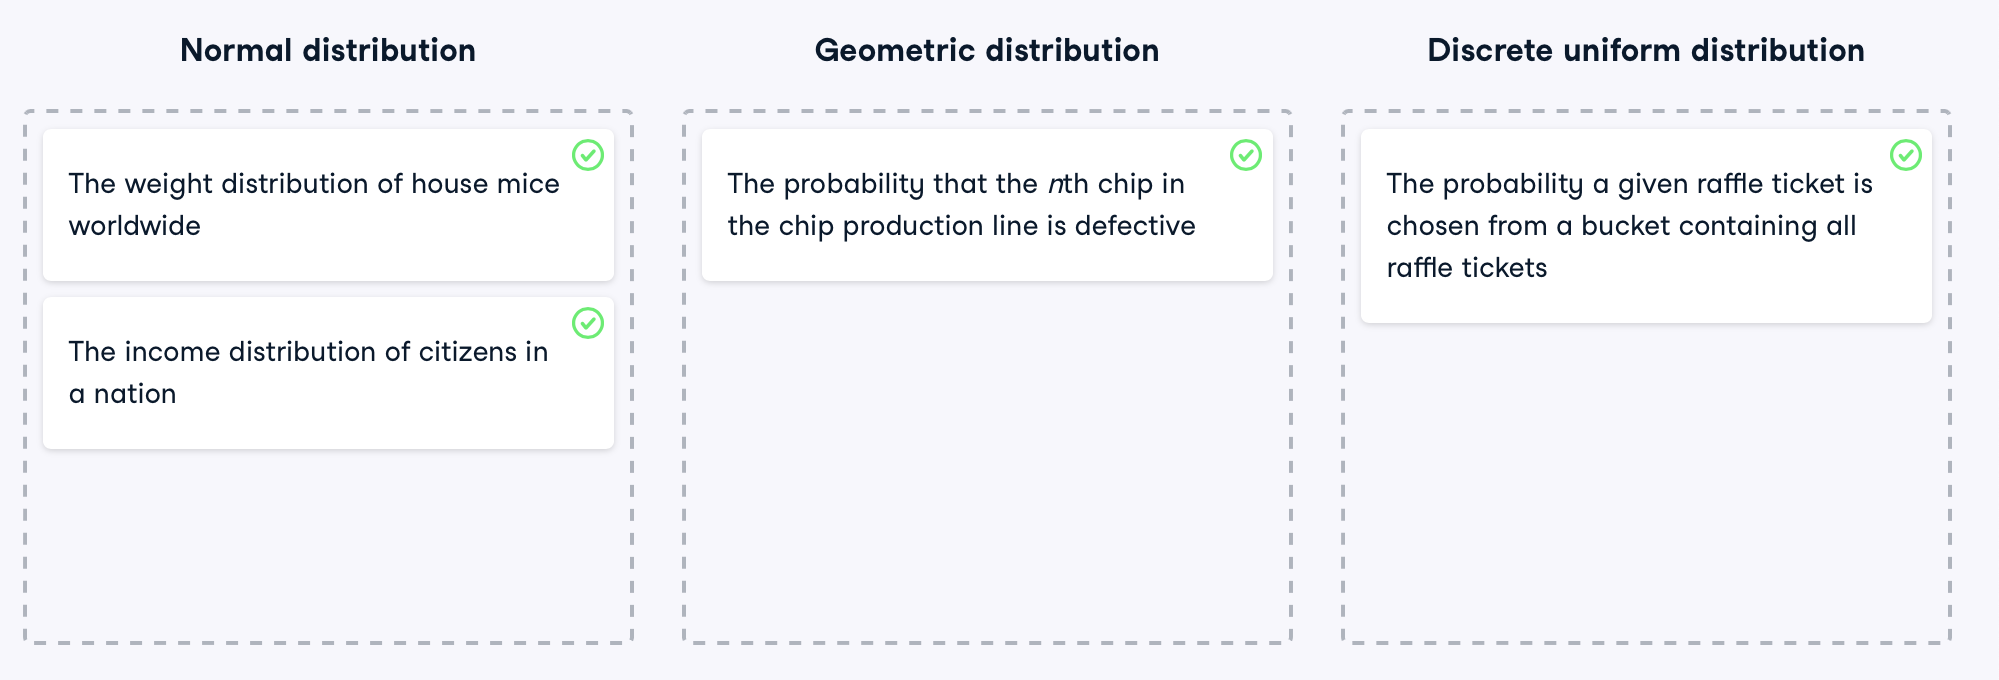

In [ ]:
# List candidate distributions to evaluate
list_of_dists = ['laplace', 'norm', 'expon']
for i in list_of_dists:
    dist = getattr(st, i)
    # Fit the data to the probability distribution
    param = dist.fit(dia['ldl'])
    # Perform the ks test to evaluate goodness-of-fit
    result = st.kstest(dia['ldl'], i, args=param)
    print(result)

In [ ]:
# Create a pairplot of bmi and hdl
sns.pairplot(df_diffs[['bmi', 'hdl']])
plt.show()

In [ ]:
# Plot a cluster map of the correlation between bmi and hdl
sns.clustermap(df_diffs[['bmi', 'hdl']].corr(), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
# Convert the hdl and bmi columns of df_diffs from wide to long format, naming the values column "y_diff"
hdl_bmi_long = df_diffs.melt(value_name='y_diff', value_vars=['bmi', 'hdl'])
print(hdl_bmi_long.head())

# Use a boxplot to visualize the results
sns.boxplot(x='variable', y='y_diff', data=hdl_bmi_long)
plt.show()

In [ ]:
# Run a Monte Carlo simulation 500 times using a mean_inflation of 2 and a mean_volume of 500
profits = profit_next_year_mc(mean_inflation=2, mean_volume=500, n=500)

# Create a displot of the results
sns.displot(profits)
plt.show()

In [ ]:
x1 = []
x2 = []
y = []
for infl in [0, 1, 2, 5, 10, 15, 20, 50]:
    for vol in [100, 200, 500, 800, 1000]:
		# Run profit_next_year_mc so that it samples 100 times for each infl and vol combination
        avg_prof = np.mean(profit_next_year_mc(infl, vol, 100))
        x1.append(infl)
        x2.append(vol)
        y.append(avg_prof)
df_sa = pd.concat([pd.Series(x1), pd.Series(x2), pd.Series(y)], axis=1)
df_sa.columns = ["Inflation", "Volume", "Profit"]
# Create a displot of the simulation results for "Profit"
sns.displot(df_sa["Profit"])
plt.show()

In [ ]:
# Complete the hexbin to visualize sensitivity analysis results
df_sa.plot.hexbin(x="Inflation",
     y="Volume",
     C="Profit",
     reduce_C_function=np.mean,
     gridsize=10,
     cmap="viridis",
     sharex=False)
plt.show()